In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import math

# $Poisson \, Process$

This is the first time for the experiment in the HUST,today's agenda is about a very important part in the discrete space, *poisson process*. It has a lot of variants, like 
- nonhomongeneous poisson process
- filted poisson process
- compound poisson process
- queueing theory

## $Task \, 1$

Consider the nonhomogeneous Poisson process with its intensity function as follow:
$$
\lambda(t) = 8.924 - 1.584 cos\frac{\pi t}{1.51} + 7.897sin \frac{\pi t}{3.02} - 10.434cos \frac{\pi t}{4.53} + 4.293cos \frac{\pi t}{6.04}
$$
1. Write a program to generate (simulate) the first eighty arrival times. 
2. Given t= 8 (hours), write a program to generate N(8) and then the arrival times in the interval (0, 8]. 

For both parts, draw the respective histograms showing the hourly arrival counts.

$$
F(X) = \left\{
            \begin{matrix}
                \frac{m(x)}{m(t)} & x \le t \\
                1 & x > t
            \end{matrix}
        \right.
    \tag{2.3.8}
$$

(Hint for problem 2: Using `Equation 2.3.8` requires first integrating $\lambda(t)$ to obtain $m(t)$. Another way is by sampling from the density of `Equation 2.3.8.` Generating random samples from a density can be accomplished by the rejection method described as follows. 

We want to take a sample $X$ from the density $f$. but it is not easy to do it directly. Suppose that taking a sample $Y$ from the density $g$ is easy, for example, $g$ is uniform. Let $C$ be a constant such that $f(x)/g(x)≤c$ for all $x$. Then we generate a $Y$ and a standard uniform deviate $U$.If $U≤f(Y)/cg(Y)$, then we set $X←Y$; otherwise, we repeat the procedure.)

### $Question 1$


First of all, we have a look on the intensity function $\lambda(t)$, ensure that in the time interval $[0, 8]$, the intensity function $\lambda(t)$ is bigger than $0$.

In [2]:
def lambda_func(t):
    val = 8.924 - 1.584 * np.cos(np.pi * t / 1.51) + 7.897 * np.sin(np.pi * t / 3.02) - 10.434 * np.cos(np.pi * t / 4.53) + 4.293 * np.cos(np.pi * t / 6.04)
    return val

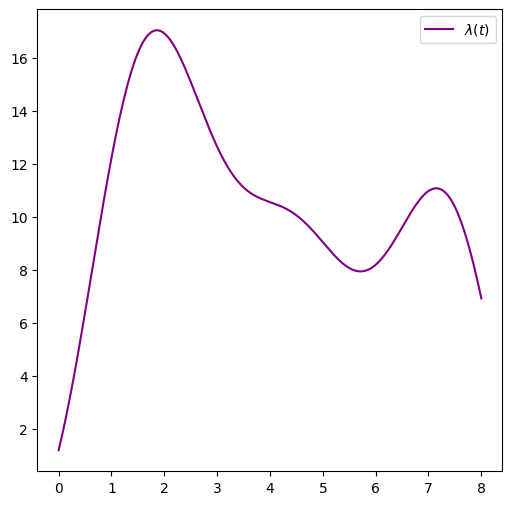

In [3]:
N = np.linspace(0, 8, 1000)
func_val = lambda_func(N)
plt.figure(figsize=(6,6))
plt.plot(N, func_val, label="$\lambda(t)$", color="purple")
plt.legend()
plt.show()

From the plot, we can find that the intensity function is bigger than $0$, during the time interval $[0, 8]$. and we can have the view that the time interval between two event successful occurence follows the distribution as follow.

$$f(t) = \lambda(t) exp(\int_{0}^{t} \lambda(s)ds) $$

so we can generate each time interval between two successful events and add them all together for simulating the cases.

In [4]:
def generate_timeInterval():
    L, R = 0, 8.0
    std_pro = np.random.rand()
    while (abs(L - R) > 1e-4):
        mid = (L + R) / 2.0
        new_pro = lambda_func(mid) * quad(lambda_func, L, mid)[0]
        if  new_pro < std_pro:
            L = mid
        else:
            R = mid
    return L

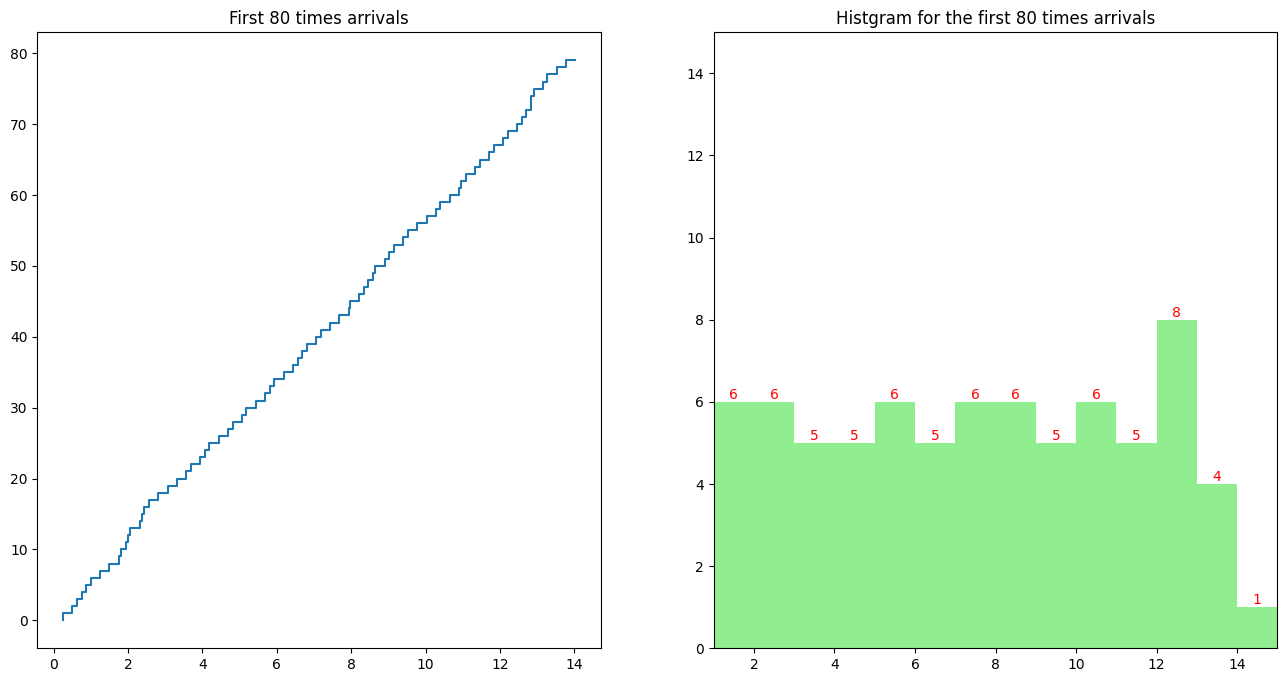

In [5]:
max_times = 80
T = [generate_timeInterval() for _ in range(max_times)]
S = [T[0]]
for k in range(1, max_times):
    S.append(S[k - 1] + T[k])

xbins = [i for i in range(1, math.ceil(max(S)) + 1)]

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.step(S, [i for i in range(80)])
plt.title("First 80 times arrivals")
plt.subplot(1, 2, 2)
plt.hist(S, bins=xbins, color="lightgreen")
plt.xlim([1, len(xbins)])
plt.ylim([0, 15])
plt.title("Histgram for the first 80 times arrivals")

for count, x in zip(np.histogram(S, bins=xbins)[0], xbins[:-1]):
    if count > 0:
        plt.text(x + 0.5, count, str(count), ha='center', va='bottom', color="red")

plt.show()

### $Question 2$

The same way for generating the time interval, and add them altogether, until the sum of them is bigger than $T = 8$, then show the plot by using the datas.

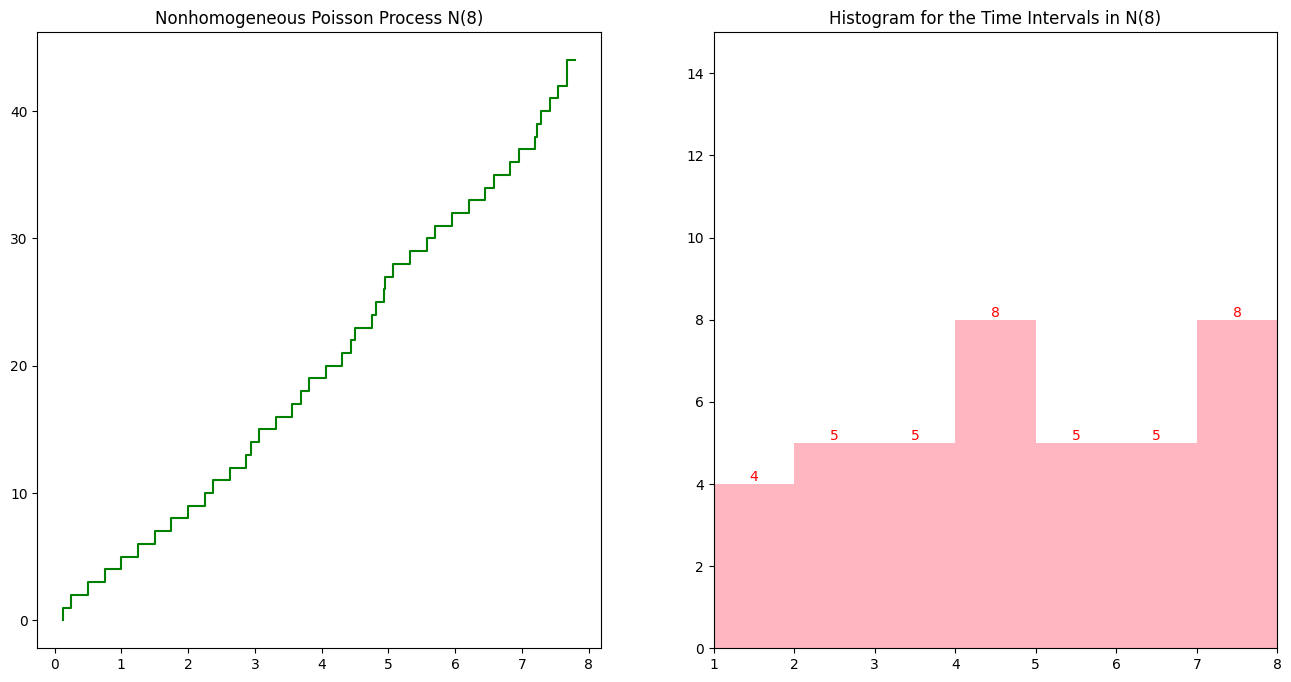

The value of N(8) is 45


In [6]:
times = 0
T = 0
S = []

while True:
    new_time = generate_timeInterval()
    T = T + new_time
    if T > 8:
        break
    S.append(T)
    times += 1

xbins = [i for i in range(1, math.ceil(max(S)) + 1)]

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.step(S, [i for i in range(len(S))], color="green")
plt.title("Nonhomogeneous Poisson Process N(8)")
plt.subplot(1, 2, 2)
plt.hist(S, bins=xbins, color="lightpink")
plt.xlim([1, len(xbins)])
plt.ylim([0, 15])
plt.title("Histogram for the Time Intervals in N(8)")

for count, x in zip(np.histogram(S, bins=xbins)[0], xbins[:-1]):
    if count > 0:
        plt.text(x + 0.5, count, str(count), ha='center', va='bottom', color="red")

plt.show()

print("The value of N(8) is %d" %len(S))

## $Task \, 2$

Consider the problem described in Example 2.3.9. Suppose now that we have two identical HP computers to handle the incoming traffic.Assume that the service time of each computer is exponential with a rate of 3.5 per hour(so the aggregate total service rate is still 7 per hour).Again we assume that there are three waiting spaces.A waiting customer will be served by the first computer that becomes free on a first-come-first-served basis.Compute the loss probabilities as a function of time t over the interval [0, 8].Plot your results and compare them against those shown in Figure 2.7. 

From the background of the problem, we can have the parameters as follow.
- $M(t)$: the arrival rate of customer is $\lambda(t) = 8.924 - 1.584 cos\frac{\pi t}{1.51} + 7.897sin \frac{\pi t}{3.02} - 10.434cos \frac{\pi t}{4.53} + 4.293cos \frac{\pi t}{6.04}$
- $M$: the serving time rate of the system is $\mu$ = 3.5 for one system

In order to verify the plot on the textbook, we consider simulate the process and calculate their empirical probability $\hat{P}(t)$ and plot the figure.

First, let us simulate the process, and have a look at what situation is, in order to find more precise analysis, I will show five plots.

In [7]:
def generate_servetime(t):
    pro = np.random.rand()
    mu =  3.5
    return t + (- math.log(1 - pro) / mu)

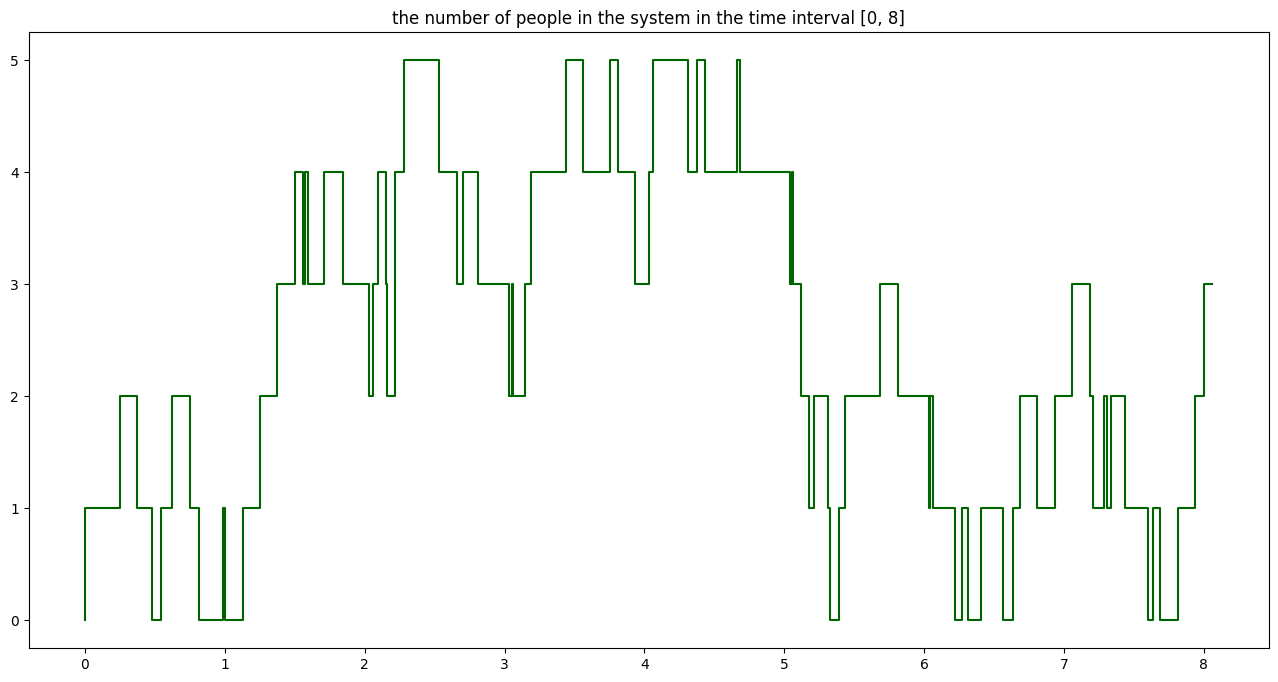

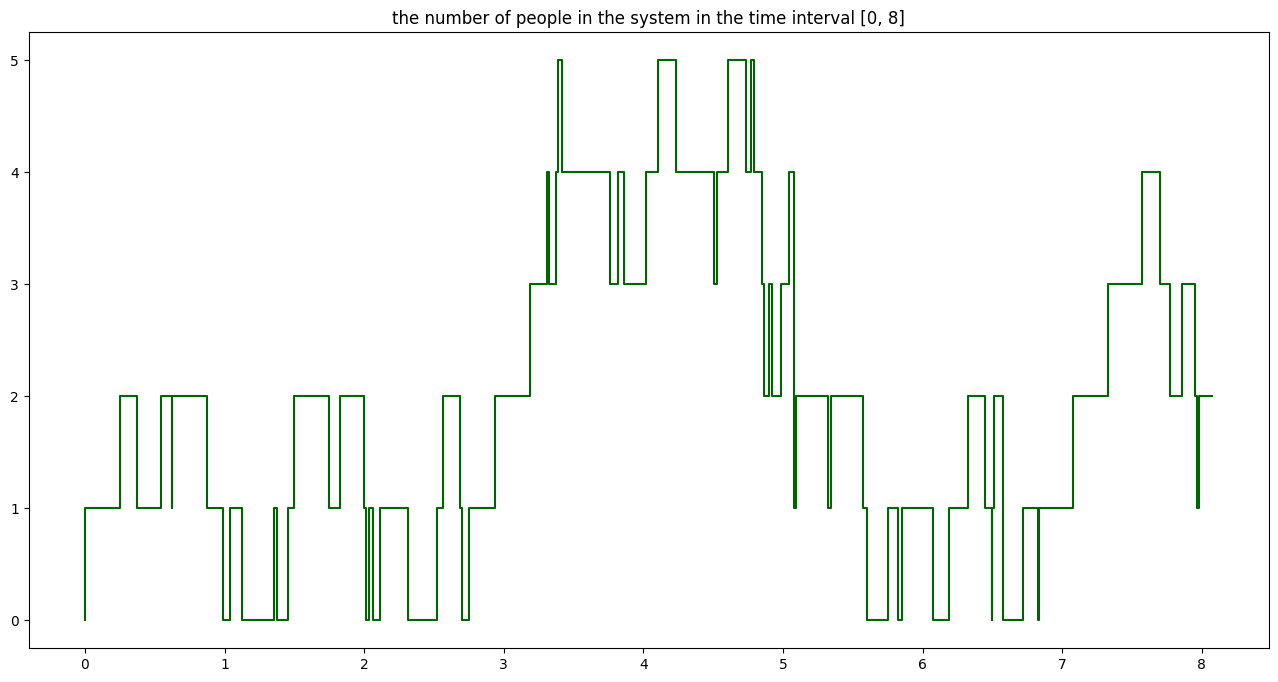

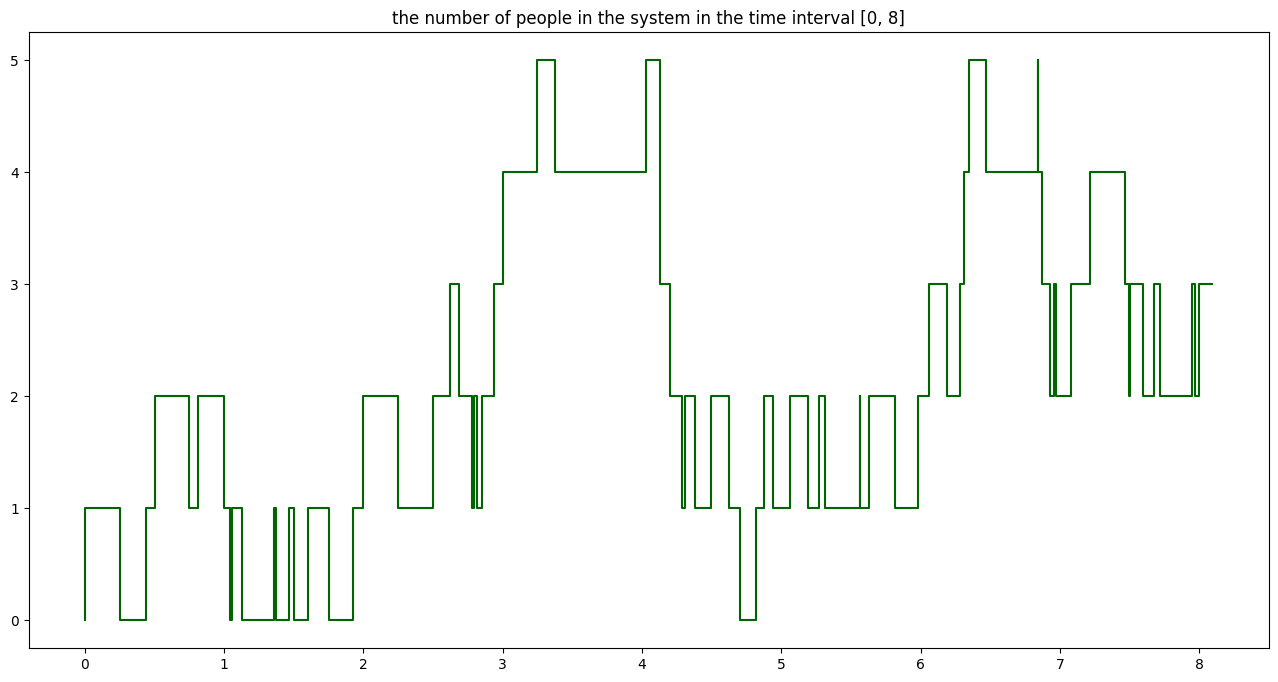

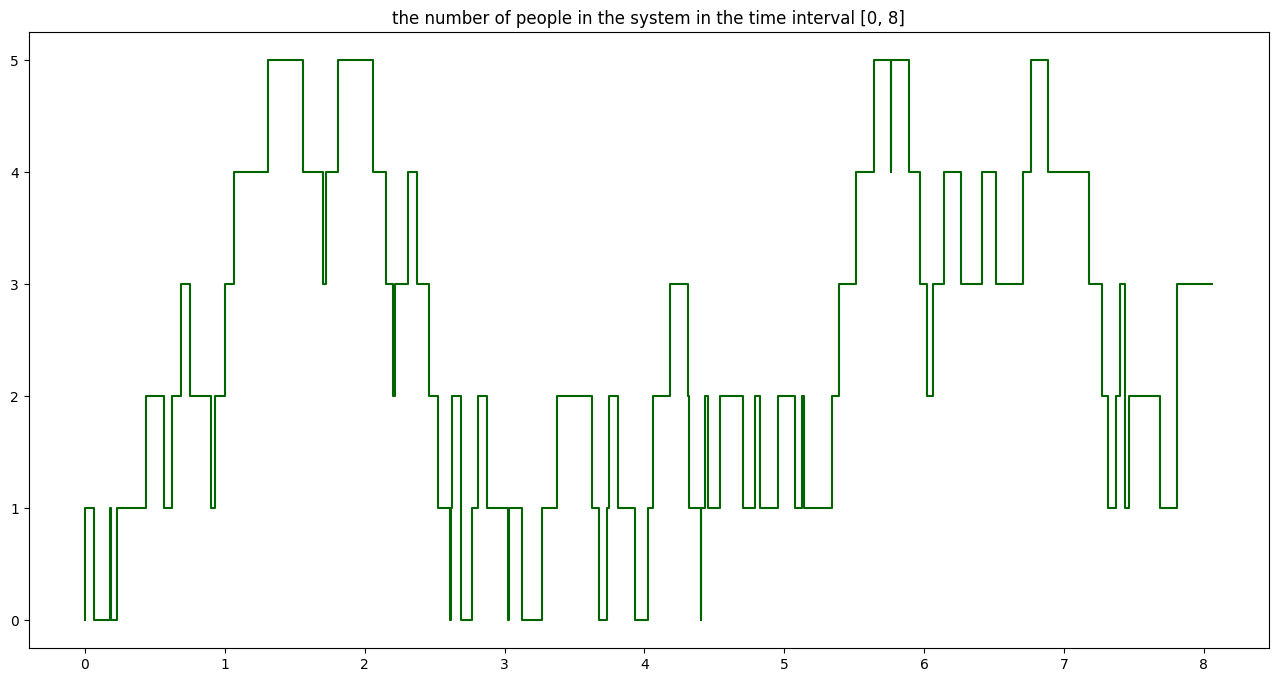

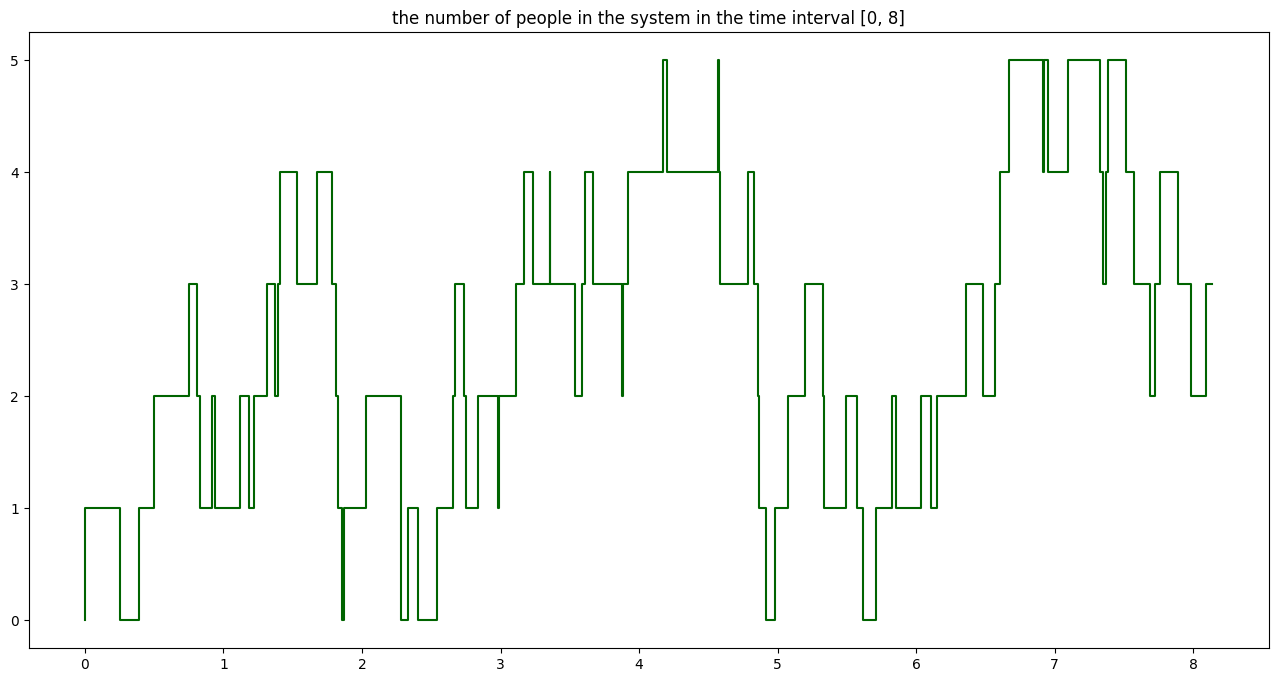

In [8]:
max_times = 1000

S = []
vals = []

def find(lis):
    pos = -1
    for i in range(len(lis)):
        if lis[i] == 0:
            continue
        elif pos == -1:
            pos = i
        if lis[i] < lis[pos]:
            pos = i
    return pos


for k in range(max_times):
    s, val = [0], [0]
    in_serve = [0.0, 0.0]
    T, right_val, waitings = 0, 0, 0
    while T < 8:
        new_event = generate_timeInterval()
        T += new_event
        while True:
            pos = find(in_serve)
            if pos == -1:
                break
            if in_serve[pos] < T:
                s.append(in_serve[pos])
                right_val -= 1
                val.append(right_val)
                if waitings > 0:
                    in_serve[pos] = generate_servetime(in_serve[pos])
                    waitings -= 1
                else:
                    in_serve[pos] = 0
            else:
                break
        if right_val < 5:
            right_val += 1
            s.append(T)
            val.append(right_val)
            waitings += 1
        for k in range(len(in_serve)):
            if in_serve[k] == 0 and waitings > 0:
                in_serve[k] = generate_servetime(T)
                waitings -= 1
                
    S.append(s)
    vals.append(val)
for k in range(5):
    plt.figure(figsize=(16,8))  
    plt.step(S[k], vals[k], color="darkgreen")    
    plt.title("the number of people in the system in the time interval [0, 8]")
    plt.show()

From the plot, we can have the calculation of the empirical probability of this process $M(t)/M/2/5$.

In [9]:
T = np.linspace(0.1, 8, 2000)
sum = []
for deltT in T:
    val_sum = []
    for i in range(len(S)):
        pos = np.searchsorted(S[i], deltT, side='left')
        val_sum.append(vals[i][pos - 1])
    tot = 0 
    for each in val_sum:
        if each >= 5:
            tot += 1
    sum.append(tot / len(S))

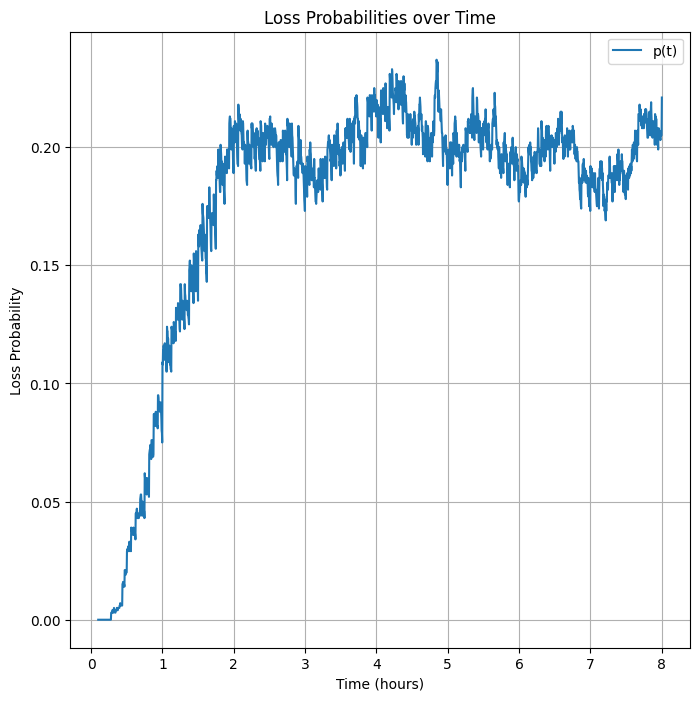

In [10]:
plt.figure(figsize=(8,8))
plt.plot(T, sum, label="p(t)")
plt.xlabel('Time (hours)')
plt.ylabel('Loss Probability')
plt.title('Loss Probabilities over Time')
plt.grid(True)
plt.legend()
plt.show()

## $Summary$
what a nice outcome, the plot has reflects the process of the whole, although the plot is not flatten, but it has an fundemental trend for us to find the deeper conclusion.